In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
%matplotlib inline
from sklearn.datasets import make_regression

# Total Least Squares

Total Least Squares is considered an "errors-in-variables" model as in its usage both the numerical features (dependent variables) and the labels (independent variables) are corrupted by noise. Total Least Squares is also sometimes referred to as orthogonal regression.

In [63]:
# Total least squares assumes corruption in all variables, i.e both in input and output data
#a great way to solve for the solution is by manipulating the k+1th singluar value of the SVD decomposition of [A,b]
import numpy as np
def TLS(A,b):
    svd_matrix= np.vstack((A.T,b)).T
    U,sigma,V_transpose= np.linalg.svd(svd_matrix)
    V= V_transpose.T
    split= A.shape[1]
    Vyy= V[split:,split:]
    Vxy= V[:split,split:]
    sol_tls= -Vxy/Vyy
#now we can also return the denoised A and b as well
    V_split= V[:,split:]
    A_error= np.matmul(svd_matrix,V_split)
    A_error= -np.matmul(A_error,V_split.T)
    A_e= A_error[:,:split]
    A_tls= A + A_e
    b_tls= np.matmul(A_tls,sol_tls)
    return sol_tls,A_tls,b_tls

In [64]:
#this method is an ordinary least square solvers, good for datasets with uniform data, no need for reguralization
def OLS(A,b):
    #solving the equation Ax=b
    if (matrix_rank(np.matmul(A.T,A)) != A.shape[1]):
        print("Matrix times its tranpoise is not full rank")
    lhs= np.matmul(A.T,A)
    rhs= np.matmul(A.T,b)
    x=np.matmul(np.linalg.inv(lhs),rhs)
    return x

Creating sample data courtesy of https://towardsdatascience.com/total-least-squares-in-comparison-with-ols-and-odr-f050ffc1a86a

In [65]:
x, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

We will now create an error function that will help us calculate the error between our predicted labels, and the true labels

# Note on Mean sqared error (MSE)
The MSE is a measure of the quality of an estimator. It calculates the mean squared difference across two quantities. The mean squared error is never negative, and the closer to zero, the better the estimate 

In [66]:
def MSE(y_true,y_predicted):
    return (1/len(y_true))*np.sum((np.subtract(y_true,y_predicted))**2)

To begin with, let's visualize our data

Text(0.5,1,'Plotting the true data')

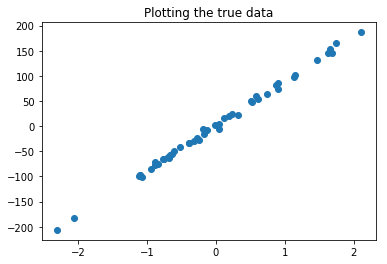

In [67]:
plt.scatter(x,y)
plt.title("Plotting the true data")

The mean squared error is 751409.7183623331


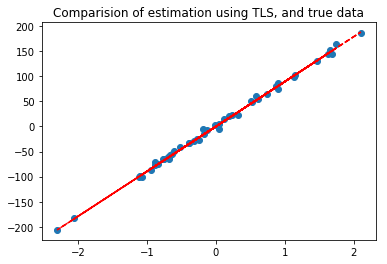

In [68]:
weights_predicted,A,b= TLS(x,y)
y_predicted= np.matmul(x,weights_predicted)
error= MSE(y,y_predicted)
plt.scatter(x,y)
plt.plot(x,y_predicted,linestyle='dashed',c='red')
plt.title("Comparision of estimation using TLS, and true data")
mse= MSE(y,y_predicted)
print("The mean squared error is " + str(mse) )

Let us up the noise and see what happens

In [69]:
x, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=100,
    coef=True,
    random_state=1
)

Text(0.5,1,'Plotting the true data')

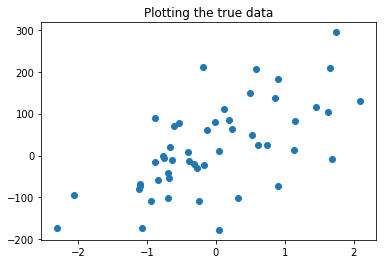

In [70]:
plt.scatter(x,y)
plt.title("Plotting the true data")

Text(0.5,1,'Comparision of estimation using TLS, and true data')

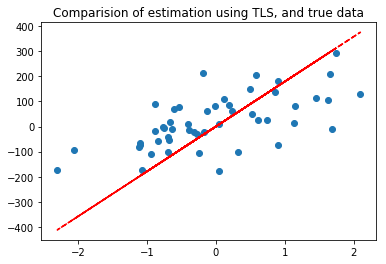

In [73]:
weights_predicted,A,b= TLS(x,y)
y_predicted= np.matmul(x,weights_predicted)
error= MSE(y,y_predicted)
plt.scatter(x,y)
plt.plot(x,y_predicted,linestyle='dashed',c='red')
plt.title("Comparision of estimation using TLS, and true data")

Comparing to ordinary least squares:

Text(0.5,1,'Comparision of estimation using OLS, and true data')

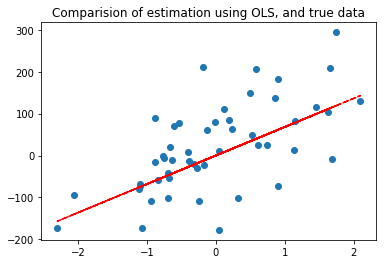

In [74]:
weights_predicted= OLS(x,y)
y_predicted= np.matmul(x,weights_predicted)
error= MSE(y,y_predicted)
plt.scatter(x,y)
plt.plot(x,y_predicted,linestyle='dashed',c='red')
plt.title("Comparision of estimation using OLS, and true data")